In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Generating Test Data


When we implement or test various methods for machine learning (e.g., neural networks), we need the ability to generate data with prescribed properties and also to generate "random" data or randomly select data from a given set of data. For generating random data, we need to know the probability distribution of the data.


For a random variable $V$ with the *uniform probability distribution* on an interval $\langle A,B\rangle$ it holds:

* the density function of the distribution is $\displaystyle h(x) = \begin{cases}
             \frac{1}{B-A} & \text{for } x \in \langle A,B \rangle\\
             0              & \text{otherwise}
         \end{cases}$

* a random number from the distribution can be generated using the function `random.uniform(A,B)`, which is included in the standard Python library

In [5]:
import random

A, B = 10, 20
random.uniform(A,B)

17.53294357804288

* An $m \times n$ matrix `s` represented as `numpy` array of numbers from the uniform distribution on the interval $\langle A,B \rangle$ can be generated as

In [8]:
A = 10
B = 20

m = 3
n = 4

# using just the Python standard library random
# YOUR CODE GOES HERE
s = np.asarray([[random.uniform(A,B) for j in range(n)] for i in range(m)])

# using numpy
# YOUR CODE GOES HERE 

# (m, n) = size of matrix
s = np.random.uniform(A, B, (m, n))

For a random variable $V$ with the *normal (or Gauss) distribution* with mean $\mu$ and variance $\sigma^2$ it holds:

* the density function is the following $\displaystyle p(x) = \frac{ 1}{ \sqrt{2 \pi \sigma^2}} e^{
  -\frac{(x-\mu)^2}{2\sigma^2}}$

* For the random variable $V$ it holds that with the probability 95\% its value is from the interval
  $\langle\mu-1.96\sigma,\mu+1.96\sigma\rangle$.


The function `random.gauss(mu, sigma)` generates a random number from the normal distribution with mean `mu` and variance `sigma`. Such distribution is denoted as ${\cal N}(\texttt{mu}, \texttt{sigma})$.

In [9]:
random.gauss(5,1)

5.060429887019198

 A numpy array `s` of size $m \times n$ with numbers from the normal distribution with mean `mu` and variance `sigma` can be generated as follows:

In [10]:
mu, sigma = 2, 0.3 # mean and standard deviation

s = np.random.normal(mu, sigma, 10000) #10000 the size, sigma is the standard deviation
print('s.shape:', s.shape)
print(s[:10])

s.shape: (10000,)
[2.13102094 1.71143833 1.66379438 2.2383948  2.44043057 1.4749654
 1.71170259 2.05168876 2.32090074 2.24509991]


Verify the mean and the variance:

In [11]:
# is the mean eaqual to mu?
abs(mu - np.mean(s))

0.0005715490038080695

In [12]:
# is the standard deviation sigma?
abs(sigma - np.std(s, ddof=1)) #degrees of freedom = 1 

0.0008609348513103909

**Question:** Why in the above code `ddof=1` is used?

Display the histogram of the samples, along with the probability density function:

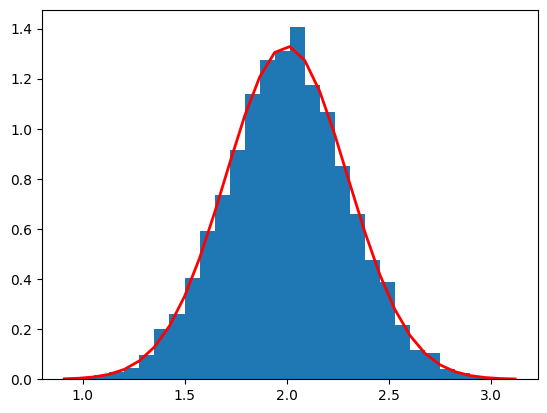

In [19]:
s = np.random.normal(mu, sigma, 10000)
bins = 30 #the range of the values, put? in 30 bins

count, bins, ignored = plt.hist(s, bins, density=True)

#implementation of the density formula 
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')

**Question:** Why `density=True` is used in the above call to `plt.hist`?

Generate a two-dimensional array of samples from ${\cal N}(3, 2.5)$:

In [14]:
s = np.random.normal(3, 2.5, size=(2, 4))
print('s.shape:', s.shape)
print(s)

s.shape: (2, 4)
[[ 3.72756819  2.76459124  3.55136932  4.81832738]
 [ 2.55893811  3.36225839 -1.43782651 -1.36120967]]


## Generating Vector with Two Clusters

Implement a function `randv2n(n1,mu1,sigma1,n2,mu2,sigma2)` that
generates one-row vector containing `n1` numbers
from the **normal distribution** with mean `mu1` and standard deviation
`sigma1` and another `n2` numbers from the normal distribution with mean `mu2` and variance `sigma2`.

E.g., `randv2n(3,-10,1,4,10,1)` can return numbers (rounded)

`[  9.95050222 -10.61370077   9.87080321  -7.90992686   9.34644975
   8.75197336 -11.08548289]`

Note that the numbers from the two clusters are **randomly mixed** in the returned vector. This can be achieved using the function `random.shuffle(x)` for an iterable `x` or `np.random.shuffle` for numpy arrays. 

In [27]:
def randv2n(n1,mu1,sigma1,n2,mu2,sigma2):
    #mu1 mean value first cluster
    #N2 number of elements in the second cluster
    # YOUR CODE GOES HERE
    first = np.random.normal(mu1, sigma1, n1)
    second = np.random.normal(mu2, sigma2, n2)
    x = np.concatenate((first, second), axis=0)
    random.shuffle(x)
    return x

print(randv2n(3,-10,1,4,10,1))

[ 10.64573325   8.58845716 -11.63412717   9.37501992   9.75982145
  -9.50690535 -10.41004882]


Demonstrate your implementation by constructing a histogram of the returned vector. How can we set up the number of bins in the histogram?

[ 10.74591744  10.17986126   9.81727143 -10.67307748  -9.00703522
 -11.24757545  10.5757532    6.93432287 -11.29980387   9.70414729
  10.38428291  10.38015631   9.35711841   9.95072753  10.07947873
  -9.86168134  11.12364464  10.85007811  10.83663299  -9.75283624
  -8.08793139  12.87111193  11.92729203  10.90369794  -9.0230547
  -7.49898084   9.89409086 -10.86902246   8.85349479  -9.58176835
  -9.32831116  -9.94579699   9.1395329   -9.35299676 -12.72546577
  10.16416214  10.99929095   8.7219969   -8.56056669  10.25307872
   9.35863971  10.0839722   10.89088929  11.04192244   9.37894157
   9.32347053   9.17728442  -7.67937807  10.02567964  -9.60936101
  11.24723631  -9.84293779 -10.94504334  10.33254905 -10.7928654
 -10.64757622  10.53723511 -10.45401462  11.08663835 -11.32965384
  -9.43385929  10.50129503   9.28912454 -10.8001088  -10.19978973
 -10.00766712 -10.80943871   9.96992289  -8.95097281  10.10297412]


(array([ 1.,  3.,  9., 10.,  4.,  2.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  9.,
        12., 15.,  2.,  1.]),
 array([-12.72546577, -11.87224651, -11.01902725, -10.165808  ,
         -9.31258874,  -8.45936948,  -7.60615023,  -6.75293097,
         -5.89971171,  -5.04649246,  -4.1932732 ,  -3.34005394,
         -2.48683469,  -1.63361543,  -0.78039617,   0.07282308,
          0.92604234,   1.7792616 ,   2.63248085,   3.48570011,
          4.33891937,   5.19213862,   6.04535788,   6.89857714,
          7.75179639,   8.60501565,   9.45823491,  10.31145416,
         11.16467342,  12.01789268,  12.87111193]),
 <BarContainer object of 30 artists>)

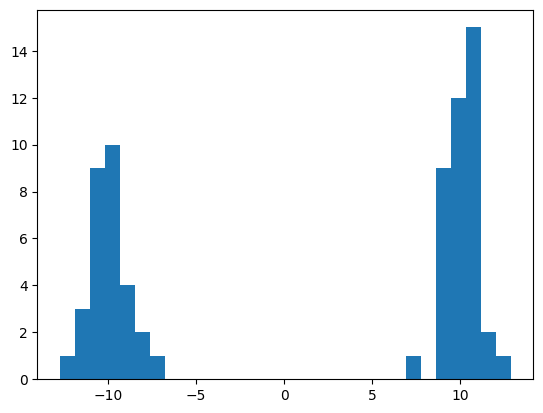

In [31]:
rv = randv2n(30,-10,1,40,10,1)
print(rv)

# plot the histogram of the vector rv
plt.hist(rv, bins=30)

## Generating Clusters in 2D

Implement a function `randn2d(n, mu1, sigma1, mu2, sigma2, draw)`, with parameters `n`, `mu1`, `sigma1`, `mu2`, `sigma2` that are `numpy` vectors of the same length $n$. The function should generate a matrix of size $\displaystyle \left(\sum_{i=1}^{n} \texttt{n[i]}\right) \times 2$ containing random points in 2D. Each row of the resulting matrix is interpreted as the coordinates of a point on a plane. In the resulting matrix, For each `i`$=1,\dots,n$, `n[i]` is the number of points in the `i`-th cluster generated randomly from the normal distribution with mean `mu1[i]` and standard deviation `sigma1[i]` in the first coordinate, and with mean `mu2[i]` and standard deviation `sigma2[i]` in the second coordinate.

If the function is called with `draw != None`, the function plots a graph with graphically distinguished clusters before returning the resulting matrix (e.g., using the function `plt.scatter()`.

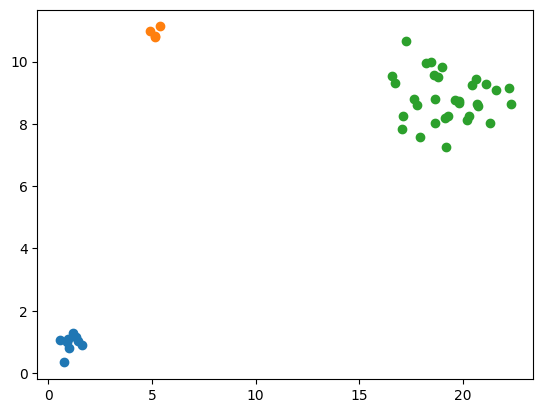

None


In [47]:
def randn2d(n, mu1, sigma1, mu2, sigma2, draw): #Scatterplot  > draw: colors       e
    # generate a random array with 2 columns
    # n[i] is the number of rows from cluster i
    # the first coordinate of elements from cluster i are generated from N(mu1[i],sigma1[i])
    # the second coordinate of elements from cluster i are generated from N(mu2[i],sigma2[i])
    # the retured array has shuffled rows
    # YOUR CODE GOES HERE 
    x = []
    y = []
    for i in range(len(n)):
        x = np.random.normal(mu1[i], sigma1[i], n[i])
        y = np.random.normal(mu2[i], sigma2[i], n[i])
        random.shuffle(x)
        random.shuffle(y)  
        plt.scatter(x, y)
    plt.show()
    

res = randn2d([10,4,32], [1, 5, 20], [.3, .3, 2.1], [1, 11, 9], [.3, 0.1, 0.7], draw="yes")


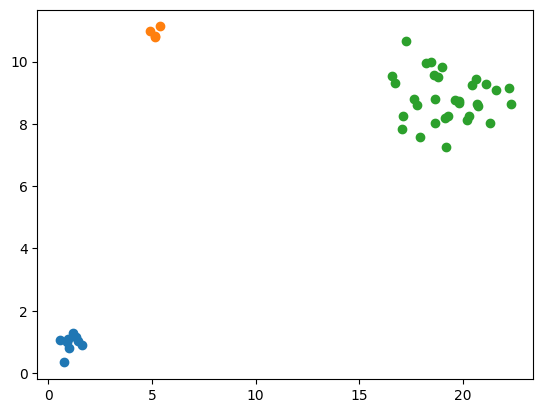

None


In [47]:
def randn2d(n, mu1, sigma1, mu2, sigma2, draw): #Scatterplot  > draw: colors       e
    # generate a random array with 2 columns
    # n[i] is the number of rows from cluster i
    # the first coordinate of elements from cluster i are generated from N(mu1[i],sigma1[i])
    # the second coordinate of elements from cluster i are generated from N(mu2[i],sigma2[i])
    # the retured array has shuffled rows
    # YOUR CODE GOES HERE 
    x = []
    y = []
    for i in range(len(n)):
        x = np.random.normal(mu1[i], sigma1[i], n[i])
        y = np.random.normal(mu2[i], sigma2[i], n[i])
        random.shuffle(x)
        random.shuffle(y)  
        plt.scatter(x, y)
    plt.show()
    

res = randn2d([10,4,32], [1, 5, 20], [.3, .3, 2.1], [1, 11, 9], [.3, 0.1, 0.7], draw="yes")


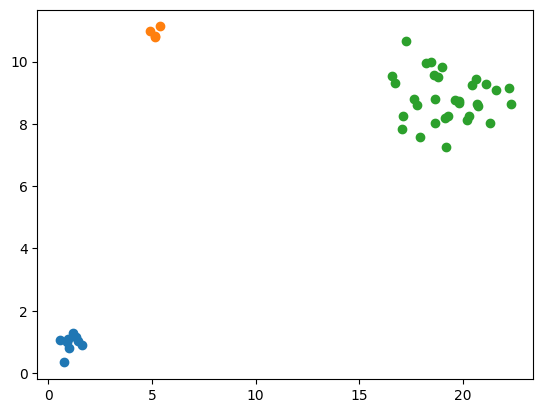

None


In [47]:
def randn2d(n, mu1, sigma1, mu2, sigma2, draw):
    # generate a random array with 2 columns
    # n[i] is the number of rows from cluster i
    # the first coordinate of elements from cluster i are generated from N(mu1[i],sigma1[i])
    # the second coordinate of elements from cluster i are generated from N(mu2[i],sigma2[i])
    # the retured array has shuffled rows
    # YOUR CODE GOES HERE 
    
    colors= ["blue","green","orange"]
    vec = np.array([0,0])
    for i in range(len(n)):
        for item in range(n[i]):
            x = np.random.normal(mu1[i], sigma1[i])
            y = np.random.normal(mu2[i], sigma2[i])
            coord = np.array([x,y])
            if draw=="yes":
                plt.scatter(x,y, c=colors[i], label= f"Cluster({mu1[i]},{mu2[i]})" if item == 0 else None)

        vec = np.vstack([vec,coord])

    vec = vec[1:]

    if draw=="yes":
        plt.legend()
        plt.show()

    np.random.shuffle(vec)
    return vec

res = randn2d([10,4,32], [1, 5, 20], [.3, .3, 2.1], [1, 11, 9], [.3, 0.1, 0.7], draw="yes")

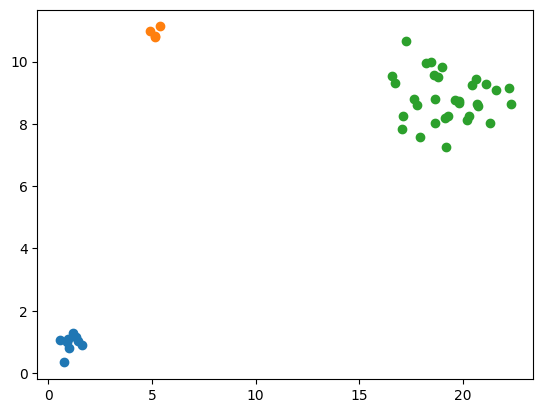

None


In [47]:
from typing import Literal


def randn2d(
    n: list[float],
    mu1: list[float],
    sigma1: list[float],
    mu2: list[float],
    sigma2: list[float],
    draw: Literal["yes", "no"],
) -> np.ndarray:
    # generate a random array with 2 columns
    # n[i] is the number of rows from cluster i
    # the first coordinate of elements from cluster i are generated from N(mu1[i],sigma1[i])
    # the second coordinate of elements from cluster i are generated from N(mu2[i],sigma2[i])
    # the retured array has shuffled rows
    # YOUR CODE GOES HERE
    clusters = [
        np.c_[
            np.random.normal(mu1[i], sigma1[i], size=n[i]),
            np.random.normal(mu2[i], sigma2[i], size=n[i]),
        ]
        for i in range(len(n))
    ]

    if draw == "yes":
        for i, cluster in enumerate(clusters):
            plt.scatter(
                x=cluster[:, 0],
                y=cluster[:, 1],
                label=f"Cluster: ({mu1[i]}, {mu2[i]})",
            )
        plt.legend() 
        plt.show()

    data_points = np.vstack(clusters) # np.r_[*clusters]
    np.random.shuffle(data_points)
    return data_points


res = randn2d(
    [10, 4, 32],
    [1, 5, 20],
    [0.3, 0.3, 2.1],
    [1, 11, 9],
    [0.3, 0.1, 0.7],
    draw="yes",
)

## Generating a Sample from Data

Write a function `selectk(x,k)` randomly selecting `k` rows from the input matrix `x`.

In [40]:
def selectk(x, k):
    # YOUR CODE GOES HERE 
    #index_rows = np.random.randint(len(x), dtype=int, size=k, replace=False)
    index_rows = np.random.choice(range(len(x)), k, replace=False) if k < len(x) else np.random.randint(len(x), dtype=int, size=k)
    return x[index_rows]

array([6, 4, 7, 3])

In [29]:
x = np.random.normal(3, 2.5, size=(10,3))
len(x)
print(x)

[[ 3.57656758 -0.42183976  0.10294559]
 [-2.21107984  4.29344752  4.05787589]
 [ 0.99090319  4.16033289  1.18700361]
 [ 2.90261747  3.85332506  2.29722734]
 [ 1.49056235  3.49614838  6.90008719]
 [ 2.42150122  7.82489388  1.44408132]
 [ 3.31178159  6.19570015  0.69672232]
 [ 0.21700401  3.52394999  7.47044872]
 [-1.4059007   8.96401735  5.37579975]
 [ 3.21924445  2.59599587  4.89990817]]


Demonstrate your implementation on a randomly generated matrix with two columns. Plot the original and selected column vectors as points on a plane. Distinguish not selected and selected data with different colors or marks.

In [42]:
selectk(x,4)

array([[-2.21107984,  4.29344752,  4.05787589],
       [ 3.21924445,  2.59599587,  4.89990817],
       [ 3.31178159,  6.19570015,  0.69672232],
       [ 1.49056235,  3.49614838,  6.90008719]])

The module `scikit-learn` contains a suitable function `train_test_split`, for randomly splitting data into training and test sets. How can we ensure that the splitting is done in the same way when we repeat the splitting?

In [25]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(x)
print("train:\n", train)
print("test:\n", test)

train:
 [[ 1.52524067  5.68866167  6.1891253 ]
 [ 6.28167299  6.93195024  0.93931037]
 [-1.23856017  2.95816895 -0.91488327]
 [ 7.74183357  3.65164477  3.45274558]
 [ 3.86513622  4.69672024 -2.7056726 ]
 [ 5.39491213 -1.21099424  0.47254597]
 [-0.12362102  0.68195703  2.03614053]]
test:
 [[ 2.38034566  2.59367591  4.84502959]
 [ 0.15562227 -0.58803172  3.2370094 ]
 [ 2.18831871  4.53196754  0.26548264]]


We can use a parameter `random_state` to ensure that the splitting is done in the same way. 

In [26]:
train, test = train_test_split(x, random_state=12345)
print("train:\n", train)
print("test:\n", test)

train:
 [[ 2.18831871  4.53196754  0.26548264]
 [ 5.39491213 -1.21099424  0.47254597]
 [-1.23856017  2.95816895 -0.91488327]
 [ 2.38034566  2.59367591  4.84502959]
 [ 0.15562227 -0.58803172  3.2370094 ]
 [ 3.86513622  4.69672024 -2.7056726 ]
 [ 6.28167299  6.93195024  0.93931037]]
test:
 [[-0.12362102  0.68195703  2.03614053]
 [ 7.74183357  3.65164477  3.45274558]
 [ 1.52524067  5.68866167  6.1891253 ]]


In [27]:
train, test = train_test_split(x, test_size=0.5, random_state=12345)
print("train:\n", train)
print("test:\n", test)

train:
 [[-1.23856017  2.95816895 -0.91488327]
 [ 2.38034566  2.59367591  4.84502959]
 [ 0.15562227 -0.58803172  3.2370094 ]
 [ 3.86513622  4.69672024 -2.7056726 ]
 [ 6.28167299  6.93195024  0.93931037]]
test:
 [[-0.12362102  0.68195703  2.03614053]
 [ 7.74183357  3.65164477  3.45274558]
 [ 1.52524067  5.68866167  6.1891253 ]
 [ 2.18831871  4.53196754  0.26548264]
 [ 5.39491213 -1.21099424  0.47254597]]


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=9929afe7-c5d8-43d3-8759-787eba3dd7ff' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>